<a href="https://colab.research.google.com/github/freejae98/freejae98.github.io/blob/master/2022_03_30_Finance_data_crawling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install finance-datareader
!pip install -U finance-datareader # 업데이트

     |████████████████████████████████| 48 kB 2.4 MB/s 


In [2]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr

In [3]:
plt.rcParams["figure.figsize"] = (20, 6)
plt.rcParams["font.family"] = 'nanummyeongjo'
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams["axes.unicode_minus"] = False

findfont: Font family ['nanummyeongjo'] not found. Falling back to DejaVu Sans.


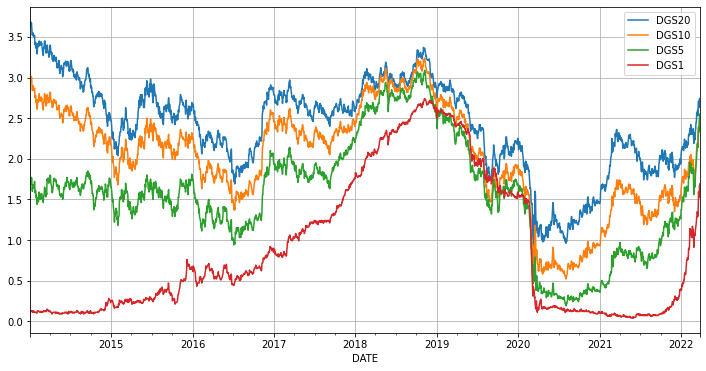

In [4]:
# 1) 미국 국채 금리 (20년, 10, 5, 1)
DGS = fdr.DataReader(['DGS20', 'DGS10', 'DGS5', 'DGS1'], start="2014-1-1", data_source = 'fred')
graph = DGS.plot()
# graph.axhline

In [5]:
DGS.head()

,DGS20,DGS10,DGS5,DGS1
DATE,,,,
2014-01-02,3.68,3.00,1.72,0.13
2014-01-03,3.69,3.01,1.73,0.13
2014-01-06,3.66,2.98,1.70,0.12
2014-01-07,3.64,2.96,1.69,0.13
2014-01-08,3.67,3.01,1.77,0.13


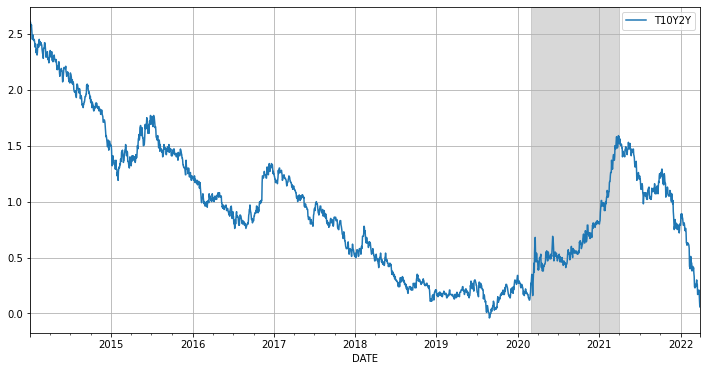

In [6]:
# 2) 미국 장단기 금리차 - 금리차가 커질수록 경제위기 발생
T10Y2Y = fdr.DataReader('T10Y2Y', start = "2014-1-1", data_source = 'fred')
graph = T10Y2Y.plot()
graph.axvspan('2020-3-1', '2021-3-30', color='gray', alpha=0.3)

In [7]:
T10Y2Y

,T10Y2Y
DATE,
2014-01-02,2.61
2014-01-03,2.60
2014-01-06,2.58
2014-01-07,2.56
2014-01-08,2.58
...,...
2022-03-23,0.19
2022-03-24,0.21
2022-03-25,0.18


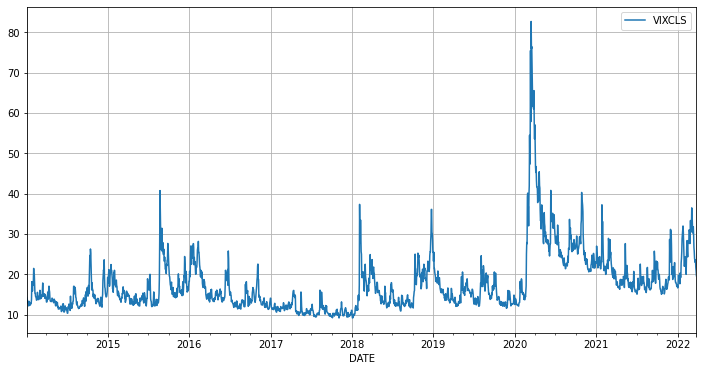

In [8]:
# 3) VIX - 변동성 지수 (공포지수)
VIX = fdr.DataReader('VIXCLS', start='2014-1-1', data_source='fred')
graph = VIX.plot()

In [9]:
VIX

,VIXCLS
DATE,
2014-01-02,14.23
2014-01-03,13.76
2014-01-06,13.55
2014-01-07,12.92
2014-01-08,12.87
...,...
2022-03-22,22.94
2022-03-23,23.57
2022-03-24,21.67


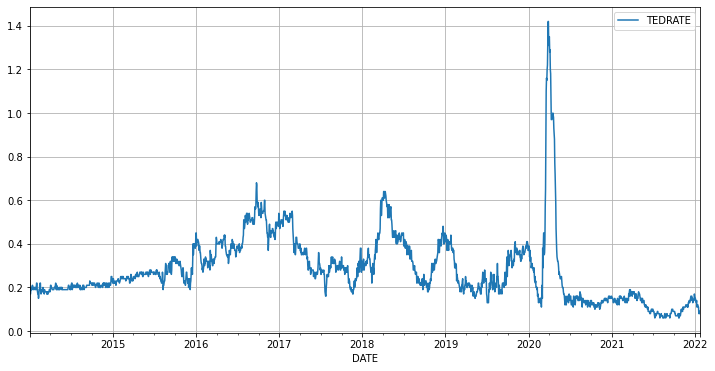

In [10]:
# 4) 금융 신용경색 지표 - TED Spread
TEDRATE = fdr.DataReader('TEDRATE', start='2014-1-1', data_source='fred')
graph = TEDRATE.plot()

In [11]:
TEDRATE

,TEDRATE
DATE,
2014-01-02,0.17
2014-01-03,0.17
2014-01-06,0.19
2014-01-07,0.20
2014-01-08,0.19
...,...
2022-01-17,0.11
2022-01-18,0.08
2022-01-19,0.09


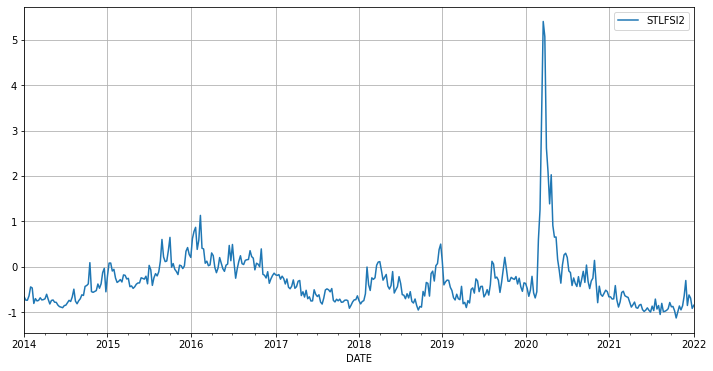

In [12]:
# 5) 금융 스트레스 지수
STLFSI2 = fdr.DataReader('STLFSI2', start='2014-1-1', data_source='fred')
graph = STLFSI2.plot()

In [13]:
STLFSI2

,STLFSI2
DATE,
2014-01-03,-0.6673
2014-01-10,-0.7387
2014-01-17,-0.7403
2014-01-24,-0.6439
2014-01-31,-0.4471
...,...
2021-12-10,-0.8560
2021-12-17,-0.6238
2021-12-24,-0.6939


In [14]:
# 6) 상품 선물 가격 데이터
df_gas = fdr.DataReader('NG') # NG 천연가스 선물 (NYMEX)
df_gold = fdr.DataReader('GC') # 금 선물 (ICE)
df_AG = fdr.DataReader('SI') # 은 선물 (ICE)
df_CU = fdr.DataReader('HG') # 구리 선물 (COMEX)
df_WTI = fdr.DataReader('CL') # WTI 선물 (NYMEX)

In [15]:
df_gas

,Close,Open,High,Low,Volume,Change
Date,,,,,,
1990-04-04,1.620,1.600,1.650,1.599,80.0,-0.0092
1990-04-05,1.615,1.615,1.635,1.610,60.0,-0.0031
1990-04-06,1.625,1.615,1.635,1.610,60.0,0.0062
1990-04-09,1.637,1.612,1.640,1.612,40.0,0.0074
1990-04-10,1.620,1.627,1.630,1.613,30.0,-0.0104
...,...,...,...,...,...,...
2022-03-23,5.232,5.147,5.330,5.092,74540.0,0.0087
2022-03-24,5.401,5.115,5.464,5.063,84230.0,0.0323
2022-03-25,5.571,5.401,5.577,5.345,29470.0,0.0315


In [16]:
# 7) 국가별 대표 지수
df_SSEC = fdr.DataReader('SSEC', '2014-01-01') # 상해 종합
df_CSI300 = fdr.DataReader('CSI300', '2014-01-01') # CSI 300 (중국)

df_DJI = fdr.DataReader('DJI', '2014-01-01') # 다우존스 지수
df_IXIC = fdr.DataReader('IXIC', '2014-01-01') # 나스닥 종합 지수
df_US500 = fdr.DataReader('US500', '2014-01-01') # S&P 500 종목

df_KS11 = fdr.DataReader('KS11', '2014-01-01') # 코스피 종합 지수

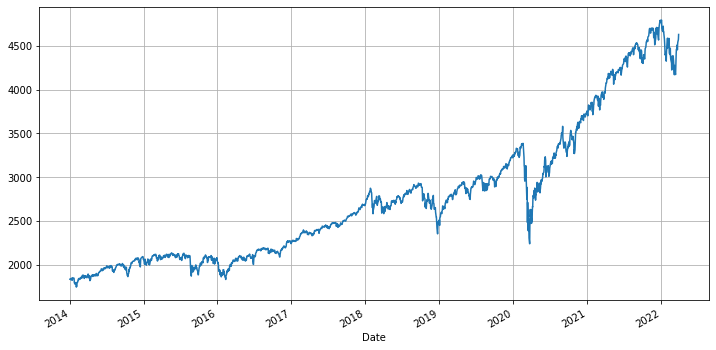

In [17]:
graph = df_US500['Close'].plot()

In [18]:
df_SSEC

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2014-01-02,2109.39,2112.13,2113.11,2101.02,6.850000e+09,-0.0031
2014-01-03,2083.14,2101.54,2102.17,2075.90,8.450000e+09,-0.0124
2014-01-06,2045.71,2078.68,2078.68,2034.01,8.960000e+09,-0.0180
2014-01-07,2047.32,2034.22,2052.28,2029.25,6.340000e+09,0.0008
2014-01-08,2044.34,2047.26,2062.95,2037.11,7.160000e+09,-0.0015
...,...,...,...,...,...,...
2022-03-24,3250.26,3256.06,3266.89,3236.66,3.290000e+10,-0.0063
2022-03-25,3212.24,3247.16,3257.11,3211.64,3.400000e+10,-0.0117
2022-03-28,3214.50,3185.17,3230.22,3159.83,3.450000e+10,0.0007


In [19]:
# # S&P 500 symbol list
# sp500 = fdr.StockListing('S&P500')
# sp500

In [20]:
# stocks = fdr.StockListing('SSE') # 상해 거래소
# stocks

In [21]:
# fdr.DataReader('CBOE', '2020-01-01', exchange='AMEX') # Cboe Global Markets (CBOE)


In [22]:
# 데이터 조합하기 - dataframe 형태로 합치기
start_date = pd.to_datetime('2014-01-02') ## 시작 날짜
end_date = pd.to_datetime('2022-02-08') ## 마지막 날짜
 
## 시작 날짜와 마지막 날짜 사이에 날짜를 생성하고 이를 인덱스로 설정
t_date = pd.date_range(start_date,end_date,freq='d')

t_date = pd.DataFrame(t_date, columns=['N_Date'])
t_date.rename(columns = {'N_Date':'Date'},inplace=True)
t_date

,Date
0,2014-01-02
1,2014-01-03
2,2014-01-04
3,2014-01-05
4,2014-01-06
...,...
2955,2022-02-04
2956,2022-02-05
2957,2022-02-06
2958,2022-02-07


In [23]:
T10Y2Y

,T10Y2Y
DATE,
2014-01-02,2.61
2014-01-03,2.60
2014-01-06,2.58
2014-01-07,2.56
2014-01-08,2.58
...,...
2022-03-23,0.19
2022-03-24,0.21
2022-03-25,0.18


In [39]:
# 데이터 하나의 툴로 조합하기

# 1) T10Y2Y - 미국 장단기 금리차
df1 = T10Y2Y.rename(columns = {'T10Y2Y':'8)T10Y2Y'})
df1.index.names = ["Date"]
df1


data_set1 = pd.merge(t_date, df1, how='left', on='Date') # , left_index=True, right_index=True)
data_set1

,Date,8)T10Y2Y
0,2014-01-02,2.61
1,2014-01-03,2.60
2,2014-01-04,NaN
3,2014-01-05,NaN
4,2014-01-06,2.58
...,...,...
2955,2022-02-04,0.62
2956,2022-02-05,NaN
2957,2022-02-06,NaN
2958,2022-02-07,0.62


In [40]:
# 2) VIX - 변동성 지수 (공포지수)
df2 = VIX.rename(columns = {'VIXCLS':'8)VIXCLS'})
df2.index.names = ["Date"]
df2


data_set2 = pd.merge(data_set1, df2, how='left', on='Date') # , left_index=True, right_index=True)
data_set2

,Date,8)T10Y2Y,8)VIXCLS
0,2014-01-02,2.61,14.23
1,2014-01-03,2.60,13.76
2,2014-01-04,NaN,NaN
3,2014-01-05,NaN,NaN
4,2014-01-06,2.58,13.55
...,...,...,...
2955,2022-02-04,0.62,23.22
2956,2022-02-05,NaN,NaN
2957,2022-02-06,NaN,NaN
2958,2022-02-07,0.62,22.86


In [42]:
# 3) TEDRATE - 금융 신용경색 지표 - TED Spread
df3 = TEDRATE.rename(columns = {'TEDRATE':'8)TEDRATE'})
df3.index.names = ["Date"]
df3


data_set3 = pd.merge(data_set2, df3, how='left', on='Date') # , left_index=True, right_index=True)
data_set3

,Date,8)T10Y2Y,8)VIXCLS,8)TEDRATE
0,2014-01-02,2.61,14.23,0.17
1,2014-01-03,2.60,13.76,0.17
2,2014-01-04,NaN,NaN,NaN
3,2014-01-05,NaN,NaN,NaN
4,2014-01-06,2.58,13.55,0.19
...,...,...,...,...
2955,2022-02-04,0.62,23.22,NaN
2956,2022-02-05,NaN,NaN,NaN
2957,2022-02-06,NaN,NaN,NaN
2958,2022-02-07,0.62,22.86,NaN


In [43]:
# 4) STLFSI2 - 금융 스트레스 지수
df4 = STLFSI2.rename(columns = {'STLFSI2':'8)STLFSI2'})
df4.index.names = ["Date"]
df4


data_set4 = pd.merge(data_set3, df4, how='left', on='Date') # , left_index=True, right_index=True)
data_set4

,Date,8)T10Y2Y,8)VIXCLS,8)TEDRATE,8)STLFSI2
0,2014-01-02,2.61,14.23,0.17,NaN
1,2014-01-03,2.60,13.76,0.17,-0.6673
2,2014-01-04,NaN,NaN,NaN,NaN
3,2014-01-05,NaN,NaN,NaN,NaN
4,2014-01-06,2.58,13.55,0.19,NaN
...,...,...,...,...,...
2955,2022-02-04,0.62,23.22,NaN,NaN
2956,2022-02-05,NaN,NaN,NaN,NaN
2957,2022-02-06,NaN,NaN,NaN,NaN
2958,2022-02-07,0.62,22.86,NaN,NaN


In [47]:
# 5) 상품 선물 가격 데이터 - df_gas / df_gold / df_AG / df_CU / df_WTI
df5_1 = df_gas.rename(columns = {'Close':'8)df_gas'})
df5_2 = df_gold.rename(columns = {'Close':'8)df_gold'})
df5_3 = df_AG.rename(columns = {'Close':'8)df_AG'})
df5_4 = df_CU.rename(columns = {'Close':'8)df_CU'})
df5_5 = df_WTI.rename(columns = {'Close':'8)df_WTI'})

# df5.index.names = ["Date"]
# df5


data_set5_1 = pd.merge(data_set4, df5_1['8)df_gas'], how='left', on='Date') 
data_set5_2 = pd.merge(data_set5_1, df5_2['8)df_gold'], how='left', on='Date') 
data_set5_3 = pd.merge(data_set5_2, df5_3['8)df_AG'], how='left', on='Date') 
data_set5_4 = pd.merge(data_set5_3, df5_4['8)df_CU'], how='left', on='Date') 
data_set5_5 = pd.merge(data_set5_4, df5_5['8)df_WTI'], how='left', on='Date') 



data_set5_5

,Date,8)T10Y2Y,8)VIXCLS,8)TEDRATE,8)STLFSI2,8)df_gas,8)df_gold,8)df_AG,8)df_CU,8)df_WTI
0,2014-01-02,2.61,14.23,0.17,NaN,4.321,4.50,NaN,3.4320,64.30
1,2014-01-03,2.60,13.76,0.17,-0.6673,4.304,4.48,NaN,3.4060,64.18
2,2014-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-01-06,2.58,13.55,0.19,NaN,4.306,4.42,NaN,3.4120,64.14
...,...,...,...,...,...,...,...,...,...,...
2955,2022-02-04,0.62,23.22,NaN,NaN,4.572,11.20,111.74,4.4875,81.12
2956,2022-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2957,2022-02-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2958,2022-02-07,0.62,22.86,NaN,NaN,4.232,11.40,117.05,4.4675,81.12


In [48]:
# 6) 국가별 대표 지수 - df_SSEC  / df_CSI300  / df_DJI  / df_IXIC  / df_US500 / df_KS11 
df6_1 = df_SSEC.rename(columns = {'Close':'8)df_SSEC'})
df6_2 = df_CSI300.rename(columns = {'Close':'8)df_CSI300'})
df6_3 = df_DJI.rename(columns = {'Close':'8)df_DJI'})
df6_4 = df_IXIC.rename(columns = {'Close':'8)df_IXIC'})
df6_5 = df_US500.rename(columns = {'Close':'8)df_US500'})
df6_6 = df_KS11.rename(columns = {'Close':'8)df_KS11'})

# df5.index.names = ["Date"]
# df5


data_set6_1 = pd.merge(data_set5_5, df6_1['8)df_SSEC'], how='left', on='Date') 
data_set6_2 = pd.merge(data_set6_1, df6_2['8)df_CSI300'], how='left', on='Date') 
data_set6_3 = pd.merge(data_set6_2, df6_3['8)df_DJI'], how='left', on='Date') 
data_set6_4 = pd.merge(data_set6_3, df6_4['8)df_IXIC'], how='left', on='Date') 
data_set6_5 = pd.merge(data_set6_4, df6_5['8)df_US500'], how='left', on='Date') 
data_set6_6 = pd.merge(data_set6_5, df6_6['8)df_KS11'], how='left', on='Date') 



data_set6_6

,Date,8)T10Y2Y,8)VIXCLS,8)TEDRATE,8)STLFSI2,8)df_gas,8)df_gold,8)df_AG,8)df_CU,8)df_WTI,8)df_SSEC,8)df_CSI300,8)df_DJI,8)df_IXIC,8)df_US500,8)df_KS11
0,2014-01-02,2.61,14.23,0.17,NaN,4.321,4.50,NaN,3.4320,64.30,2109.39,2321.98,16441.35,4143.07,1831.98,1967.19
1,2014-01-03,2.60,13.76,0.17,-0.6673,4.304,4.48,NaN,3.4060,64.18,2083.14,2290.78,16469.99,4131.91,1831.37,1946.14
2,2014-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-01-06,2.58,13.55,0.19,NaN,4.306,4.42,NaN,3.4120,64.14,2045.71,2238.64,16425.10,4113.68,1826.77,1953.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2955,2022-02-04,0.62,23.22,NaN,NaN,4.572,11.20,111.74,4.4875,81.12,NaN,NaN,35089.74,14098.01,4500.54,2750.26
2956,2022-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2957,2022-02-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2958,2022-02-07,0.62,22.86,NaN,NaN,4.232,11.40,117.05,4.4675,81.12,3429.58,4634.09,35091.13,14015.67,4483.87,2745.06


In [52]:
print(data_set6_6.isnull().sum())     # 각 열의 Null 개수 확인


# 빈데이터 채우기 - 1) 앞 값으로 채우기
data_set_FF = data_set6_6.fillna(method='ffill')
print(data_set_FF.isnull().sum())

# 빈데이터 채우기 - 2) 뒷 값으로 채우기
data_set_BF = data_set_FF.fillna(method='bfill')
print(data_set_BF.isnull().sum())

Date              0
8)T10Y2Y        846
8)VIXCLS        846
8)TEDRATE       858
8)STLFSI2      2541
8)df_gas        923
8)df_gold       986
8)df_AG        2393
8)df_CU        1026
8)df_WTI        919
8)df_SSEC       989
8)df_CSI300     989
8)df_DJI        919
8)df_IXIC       919
8)df_US500      919
8)df_KS11       968
dtype: int64
Date              0
8)T10Y2Y          0
8)VIXCLS          0
8)TEDRATE         0
8)STLFSI2         1
8)df_gas          0
8)df_gold         0
8)df_AG        2136
8)df_CU           0
8)df_WTI          0
8)df_SSEC         0
8)df_CSI300       0
8)df_DJI          0
8)df_IXIC         0
8)df_US500        0
8)df_KS11         0
dtype: int64
Date           0
8)T10Y2Y       0
8)VIXCLS       0
8)TEDRATE      0
8)STLFSI2      0
8)df_gas       0
8)df_gold      0
8)df_AG        0
8)df_CU        0
8)df_WTI       0
8)df_SSEC      0
8)df_CSI300    0
8)df_DJI       0
8)df_IXIC      0
8)df_US500     0
8)df_KS11      0
dtype: int64


In [54]:
# 완료된 것을 파일에 쓰기 - data_set_FN
data_set_FN = data_set_BF.set_index('Date', inplace=False)

data_set_FN.to_excel('/content/finance_data.xlsx', index=True)

In [55]:
data_set_FN

,8)T10Y2Y,8)VIXCLS,8)TEDRATE,8)STLFSI2,8)df_gas,8)df_gold,8)df_AG,8)df_CU,8)df_WTI,8)df_SSEC,8)df_CSI300,8)df_DJI,8)df_IXIC,8)df_US500,8)df_KS11
Date,,,,,,,,,,,,,,,
2014-01-02,2.61,14.23,0.17,-0.6673,4.321,4.50,13.02,3.4320,64.30,2109.39,2321.98,16441.35,4143.07,1831.98,1967.19
2014-01-03,2.60,13.76,0.17,-0.6673,4.304,4.48,13.02,3.4060,64.18,2083.14,2290.78,16469.99,4131.91,1831.37,1946.14
2014-01-04,2.60,13.76,0.17,-0.6673,4.304,4.48,13.02,3.4060,64.18,2083.14,2290.78,16469.99,4131.91,1831.37,1946.14
2014-01-05,2.60,13.76,0.17,-0.6673,4.304,4.48,13.02,3.4060,64.18,2083.14,2290.78,16469.99,4131.91,1831.37,1946.14
2014-01-06,2.58,13.55,0.19,-0.6673,4.306,4.42,13.02,3.4120,64.14,2045.71,2238.64,16425.10,4113.68,1826.77,1953.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-04,0.62,23.22,0.09,-0.8509,4.572,11.20,111.74,4.4875,81.12,3361.44,4563.77,35089.74,14098.01,4500.54,2750.26
2022-02-05,0.62,23.22,0.09,-0.8509,4.572,11.20,111.74,4.4875,81.12,3361.44,4563.77,35089.74,14098.01,4500.54,2750.26
2022-02-06,0.62,23.22,0.09,-0.8509,4.572,11.20,111.74,4.4875,81.12,3361.44,4563.77,35089.74,14098.01,4500.54,2750.26
